In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as p
from ipywidgets import interact, FloatSlider, widgets, IntSlider

# Зарядка:
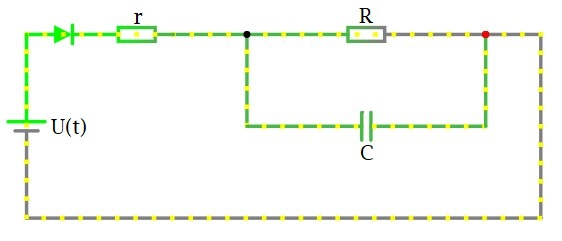
# Разрядка:
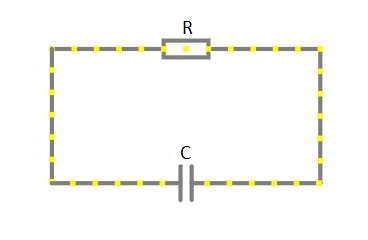

$$U_{chrg}(t) = \frac{e^{-\frac{R + r}{CRr}t} \Big(U_1(\frac{R + r}{R} - U_0)\Big) + U_0}{\frac{R + r}{R}}$$

$$U_{dischrg}(t) = \frac{U_0 \Big(1 - e^{- \frac{R + r}{CRr}\tau}\Big)}{\frac{R + r}{R} \Big(1 - e^{- \frac{R\tau + rT}{CRr}}\Big)} e^{-\frac{t}{RC}}$$

$$U_1 = U_{dischrg}(T - \tau)$$

$$U_2 = U_{dischrg}(0)$$

In [2]:
tau = 2
T = 4
U0 = 7
picks = 3
R = 2
r = 1
C = 1

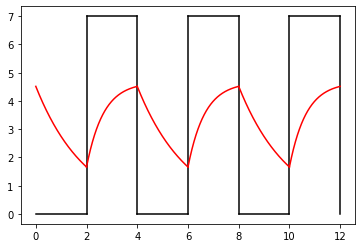

In [3]:
def draw(K, tau, T, R, r, C):
  U2 = U0 * (1 - math.exp(-((R + r) / (C * R * r) * tau))) / (((R + r) / R) * (1 - math.exp(-(R * tau + r * T) / (C * R * r))))

  def voltage2(x):
    return U2 * math.exp(-x / (R * C))

  U1 = voltage2(T - tau)

  def voltage1(x):
    return (math.exp(-((R + r) / (C * R * r) * x)) * (U1 * ((R + r) / R) - U0) + U0) / ((R + r) / R)

  x_ = p.linspace(0, T - tau, 100000)
  v2 = [voltage2(i) for i in x_]

  x1_ = p.linspace(0, tau, 100000)
  v1 = [voltage1(i) for i in x1_]

  for k in range(K):
    
    x_ = p.linspace(0 + T * k, T * (k + 1) - tau, 100000)
    x1_ = p.linspace(T * (k + 1)- tau, T * (k + 1), 100000)

    x1 = [i for i in range(0 + k * T, T * (k + 1) - tau + 1)]
    y1 = [0 for i in x1]

    y2 = [i for i in range(0, U0 + 1)]
    x2 = [T * (k + 1) - tau for i in y2]

    x3 = [i for i in range(T * (k + 1)- tau, T * (k + 1) +  1)]
    y3 = [U0 for i in x3] 

    y4 = [i for i in range(0, U0 + 1)]
    x4 = [T * (k + 1) for i in y2]

    plt.plot(x1, y1, color="black")
    plt.plot(x2, y2, color="black")
    plt.plot(x3, y3, color="black")
    plt.plot(x4, y4, color="black")
    plt.plot(x_, v2, color="red")
    plt.plot(x1_, v1, color="red")



draw(picks, tau, T, R, r, C)

In [4]:
interact(
    draw,
    K = IntSlider(min=2, max=10, step=1),
    tau = IntSlider(min=1, max=5, step=1),
    T = IntSlider(min=2, max=10, step=1),
    R = FloatSlider(min=1, max=10, step=1),
    r = FloatSlider(min=1, max=10, step=1),
    C = FloatSlider(min=1, max=10, step=1)
)

interactive(children=(IntSlider(value=2, description='K', max=10, min=2), IntSlider(value=1, description='tau'…

<function __main__.draw>